In [1]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

#pickle 
import pickle
import json
import requests

In [2]:
#import
iris = pd.read_csv("Iris.csv")
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
iris = iris.drop(columns=['Id'])

In [4]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

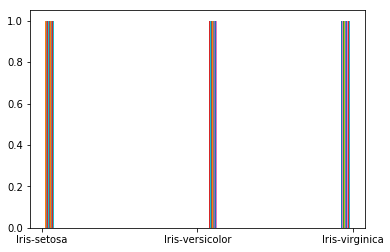

In [5]:
#check dist of y
plt.hist(iris['Species'])
plt.show()

In [6]:
#encode
le = LabelEncoder()
le.fit(iris['Species'])

LabelEncoder()

In [7]:
iris['Species'] = le.transform(iris['Species'])

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#Features
X = iris.iloc[: , :4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = iris.iloc[:,4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [11]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [12]:
#model
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [13]:
#preds
preds = model.predict(X_test)

In [14]:
print(accuracy_score(y_test, preds))

0.9210526315789473


In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      1.00      0.84         8
           2       1.00      0.79      0.88        14

   micro avg       0.92      0.92      0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38



In [16]:
#pickle
pickle.dump(model, open("iris_model.pkl", "wb"))

In [17]:
my_model = pickle.load(open("iris_model.pkl", "rb"))

In [18]:
# move to flask before below

In [19]:
url = "http://localhost:9000/api"

In [20]:
data = json.dumps({'SepalLengthCm':6.3, 'SepalWidthCm':2.8, 'PetalLengthCm':5.5, 'PetalWidthCm':1.8})

In [21]:
send = requests.post(url, data)

In [22]:
print(send.json())

{'results': {'y_hat': 2}}
